In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the dataset
df = pd.read_csv('Final_News_DF_Labeled_ExamDataset.csv')

# Label Encoding for the target column 'LABEL'
label_encoder = LabelEncoder()
df['LABEL'] = label_encoder.fit_transform(df['LABEL'])

# Separate features and target
X = df.drop(columns=['LABEL'])  # Features (word count vectors)
y = df['LABEL']  # Target (encoded labels)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data for ANN and CNN (standard scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshaping the data for LSTM (requires 3D input)
X_train_lstm = np.reshape(X_train_scaled, (X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_lstm = np.reshape(X_test_scaled, (X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Print shapes of the processed data
print(f"Shape of training data (ANN/CNN): {X_train_scaled.shape}")
print(f"Shape of testing data (ANN/CNN): {X_test_scaled.shape}")
print(f"Shape of training data (LSTM): {X_train_lstm.shape}")
print(f"Shape of testing data (LSTM): {X_test_lstm.shape}")


Shape of training data (ANN/CNN): (1194, 300)
Shape of testing data (ANN/CNN): (299, 300)
Shape of training data (LSTM): (1194, 300, 1)
Shape of testing data (LSTM): (299, 300, 1)


In [13]:
print(X_test_lstm)

[[[-0.13700851]
  [-0.08714893]
  [-0.08213016]
  ...
  [-0.16326421]
  [-0.10075854]
  [-0.09321671]]

 [[-0.13700851]
  [-0.08714893]
  [-0.08213016]
  ...
  [-0.16326421]
  [-0.10075854]
  [-0.09321671]]

 [[-0.13700851]
  [-0.08714893]
  [-0.08213016]
  ...
  [-0.16326421]
  [-0.10075854]
  [-0.09321671]]

 ...

 [[-0.13700851]
  [-0.08714893]
  [-0.08213016]
  ...
  [-0.16326421]
  [-0.10075854]
  [-0.09321671]]

 [[-0.13700851]
  [-0.08714893]
  [-0.08213016]
  ...
  [-0.16326421]
  [-0.10075854]
  [-0.09321671]]

 [[-0.13700851]
  [-0.08714893]
  [-0.08213016]
  ...
  [-0.16326421]
  [-0.10075854]
  [-0.09321671]]]


Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4667 - loss: 1.0597 - val_accuracy: 0.7191 - val_loss: 0.7317
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7877 - loss: 0.5772 - val_accuracy: 0.7291 - val_loss: 0.6324
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8608 - loss: 0.4010 - val_accuracy: 0.7324 - val_loss: 0.6209
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8935 - loss: 0.3034 - val_accuracy: 0.7358 - val_loss: 0.6450
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9187 - loss: 0.2399 - val_accuracy: 0.7592 - val_loss: 0.6865
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9209 - loss: 0.2184 - val_accuracy: 0.7559 - val_loss: 0.7245
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9319 - loss: 0.1704 - val_accuracy: 0.7492 - val_loss: 0.7880
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9411 - loss: 0.1514 - val_accuracy: 0.7291 - val_loss: 0.8180
Epo

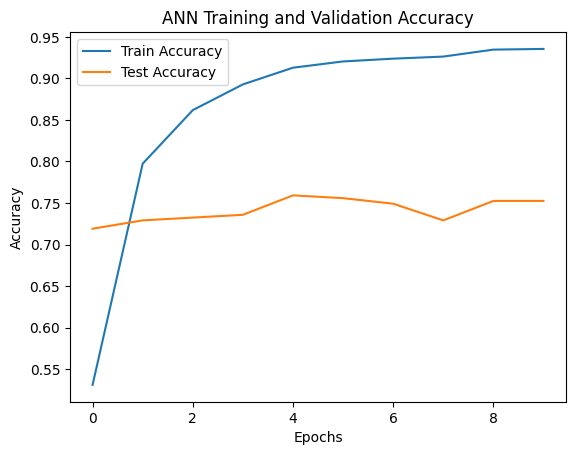

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the ANN model
ann_model = Sequential([
    Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'),  # Input layer and first hidden layer
    Dense(64, activation='relu'),  # Second hidden layer
    Dense(3, activation='softmax')  # Output layer with 3 units for classification
])

# Compile the model
ann_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
ann_history = ann_model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate the model on the test set
ann_loss, ann_accuracy = ann_model.evaluate(X_test_scaled, y_test)
print(f"ANN Test Accuracy: {ann_accuracy:.4f}")

# Plot training history
import matplotlib.pyplot as plt

plt.plot(ann_history.history['accuracy'], label='Train Accuracy')
plt.plot(ann_history.history['val_accuracy'], label='Test Accuracy')
plt.title('ANN Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


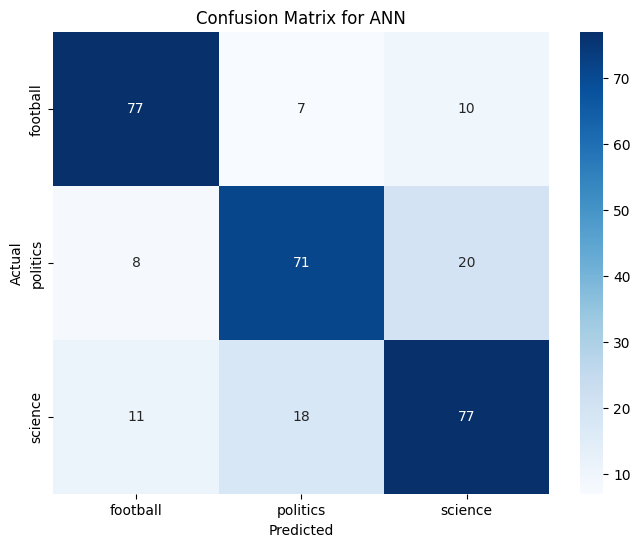

In [3]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# For ANN, CNN, and LSTM models
y_pred = ann_model.predict(X_test_scaled)
y_pred_labels = np.argmax(y_pred, axis=1)  # Predicted class labels
conf_matrix = confusion_matrix(y_test, y_pred_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix for ANN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.5156 - loss: 0.9275 - val_accuracy: 0.6856 - val_loss: 0.7135
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7749 - loss: 0.5632 - val_accuracy: 0.7090 - val_loss: 0.7146
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8477 - loss: 0.3945 - val_accuracy: 0.7425 - val_loss: 0.8093
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8898 - loss: 0.2996 - val_accuracy: 0.7458 - val_loss: 1.0046
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9065 - loss: 0.2177 - val_accuracy: 0.7391 - val_loss: 1.0828
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9092 - loss: 0.2023 - val_accuracy: 0.7358 - val_loss: 1.1942
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9301 - loss: 0.1756 - val_accuracy: 0.7391 - val_loss: 1.2437
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9342 - loss: 0.1653 - val_accuracy: 0.7324 - v

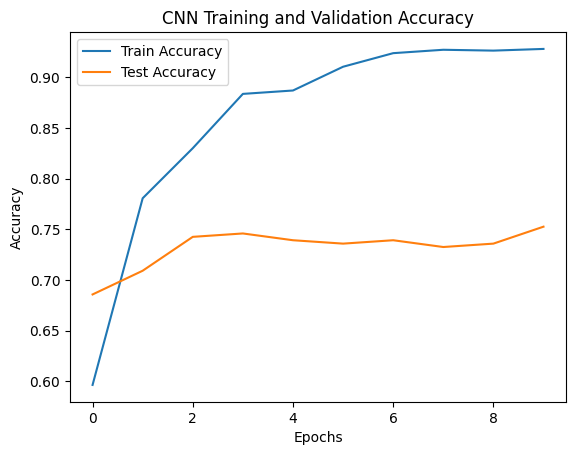

In [7]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

# Define the CNN model
cnn_model = Sequential([
    Conv1D(64, 3, activation='relu', input_shape=(X_train_scaled.shape[1], 1)),  # First Conv layer
    MaxPooling1D(2),  # Max pooling
    Conv1D(128, 3, activation='relu'),  # Second Conv layer
    MaxPooling1D(2),  # Max pooling
    Flatten(),  # Flatten the output for the dense layer
    Dense(64, activation='relu'),  # Fully connected layer
    Dense(3, activation='softmax')  # Output layer
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
cnn_history = cnn_model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate the model on the test set
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_scaled, y_test)
print(f"CNN Test Accuracy: {cnn_accuracy:.4f}")

# Plot training history
plt.plot(cnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Test Accuracy')
plt.title('CNN Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


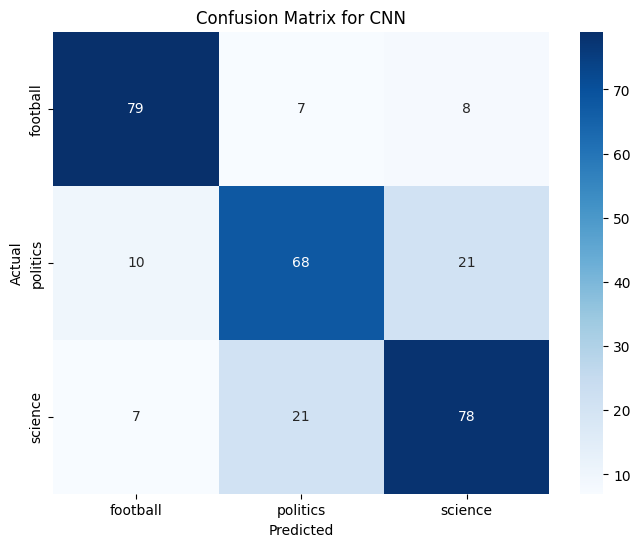

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# For ANN, CNN, and LSTM models
y_pred = cnn_model.predict(X_test_scaled)
y_pred_labels = np.argmax(y_pred, axis=1)  # Predicted class labels
conf_matrix = confusion_matrix(y_test, y_pred_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix for CNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 137ms/step - accuracy: 0.3428 - loss: 1.0982 - val_accuracy: 0.3411 - val_loss: 1.0924
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 143ms/step - accuracy: 0.3454 - loss: 1.0913 - val_accuracy: 0.4181 - val_loss: 1.0855
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 135ms/step - accuracy: 0.3853 - loss: 1.0831 - val_accuracy: 0.4849 - val_loss: 1.0695
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 134ms/step - accuracy: 0.4546 - loss: 1.0766 - val_accuracy: 0.4950 - val_loss: 1.0608
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 153ms/step - accuracy: 0.4268 - loss: nan - val_accuracy: 0.3144 - val_loss: nan
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - accuracy: 0.3480 - loss: nan - val_accuracy: 0.3144 - val_loss: nan
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 135ms/step - accuracy: 0.3377 - loss: nan - val_accuracy: 0.3144 - val_loss: nan
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 132ms/step - accuracy: 0.3477 - loss: nan - val_accuracy: 0.3144 - val_loss: nan


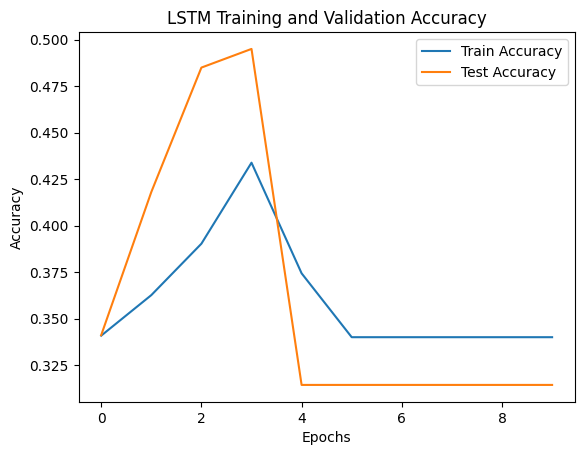

In [10]:
from tensorflow.keras.layers import LSTM

# Define the LSTM model
lstm_model = Sequential([
    LSTM(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1)),  # LSTM layer
    Dense(64, activation='relu'),  # Dense layer
    Dense(3, activation='softmax')  # Output layer
])

# Compile the model
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
lstm_history = lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_data=(X_test_lstm, y_test))

# Evaluate the model on the test set
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test_lstm, y_test)
print(f"LSTM Test Accuracy: {lstm_accuracy:.4f}")

# Plot training history
plt.plot(lstm_history.history['accuracy'], label='Train Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='Test Accuracy')
plt.title('LSTM Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


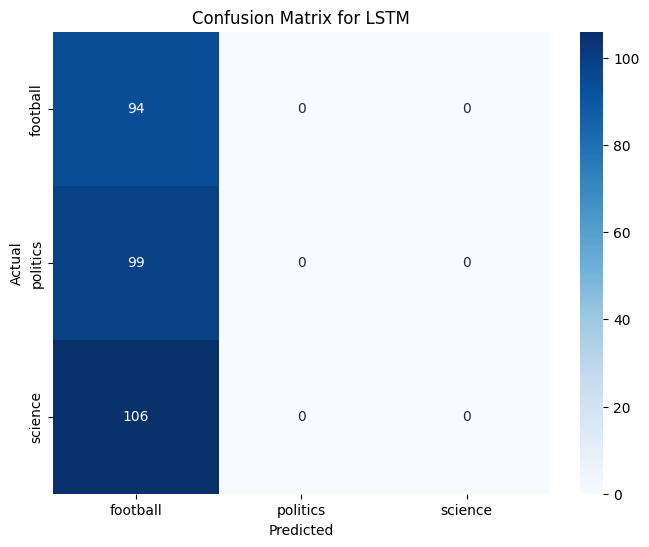

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# For ANN, CNN, and LSTM models
y_pred = lstm_model.predict(X_test_lstm)
y_pred_labels = np.argmax(y_pred, axis=1)  # Predicted class labels
conf_matrix = confusion_matrix(y_test, y_pred_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix for LSTM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
